In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

fruits = pd.read_table('C:/Users/devro/Desktop/Jupyter/fruit_data_with_colors.txt')
feature_name_fruits = ['height','width','mass','color_score']
X_fruits = fruits[feature_name_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple','mandarin','orange','lemon']

X_fruits2d = fruits[['height','width']]
y_fruits2d = fruits[['fruit_label']]

X_train ,X_test,y_train,y_test = train_test_split(X_fruits,y_fruits,random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

print("Accuracy score on train set:",knn.score(X_train_scaled,y_train))
print("Accuracy score on test set:",knn.score(X_test_scaled,y_test))




Accuracy score on train set: 0.9545454545454546
Accuracy score on test set: 1.0


In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
from sklearn.datasets import make_friedman1
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)



In [3]:
from sklearn.neighbors import KNeighborsRegressor
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
knnreg = KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)
print("Accuracy on test set:",knnreg.score(X_test,y_test))

Accuracy on test set: 0.4246800858234563


In [4]:
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
linreg = LinearRegression().fit(X_train,y_train)
print("Linear_coeff(w): {}".format(linreg.coef_))
print("Linear_bias(b): {}".format(linreg.intercept_))
print("R score on train set: {:.3f}".format(linreg.score(X_train,y_train)))
print("R score on test set: {:.3f}".format(linreg.score(X_test,y_test)))

Linear_coeff(w): [45.70870465]
Linear_bias(b): 148.44575345658873
R score on train set: 0.679
R score on test set: 0.492


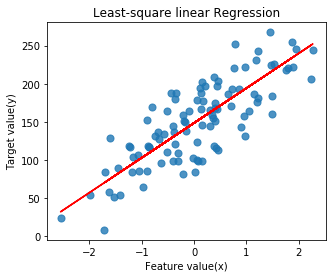

In [5]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1,y_R1,marker='o',s=50,alpha=0.8)
plt.plot(X_R1,linreg.predict(X_R1),'r-')
plt.title("Least-square linear Regression")
plt.xlabel("Feature value(x)")
plt.ylabel("Target value(y)")
plt.show()

In [6]:
from sklearn.linear_model import Ridge
X_train ,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
linrid = Ridge(alpha=20.0).fit(X_train,y_train)
print("Co-eff :",linrid.coef_)
print("Bias :",linrid.intercept_)
print("R score(Training)",linrid.score(X_train,y_train))
print("R score(Testing)",linrid.score(X_test,y_test))

Co-eff : [36.26506226]
Bias : 148.48609932907925
R score(Training) 0.6496288492459739
R score(Testing) 0.5451234572218494


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.linear_model import Ridge
X_train ,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linrid = Ridge(alpha=20.0).fit(X_train_scaled,y_train)
print("Co-eff :",linrid.coef_)
print("Bias :",linrid.intercept_)
print("R score(Training)",linrid.score(X_train_scaled,y_train))
print("R score(Testing)",linrid.score(X_test_scaled,y_test))

Co-eff : [31.23837752]
Bias : 132.076872087215
R score(Training) 0.17869808427313136
R score(Testing) 0.17314032352451428


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.linear_model import Lasso
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linLasso = Lasso(alpha=2.0,max_iter=10000).fit(X_train_scaled,y_train)
print("Co-eff:",linLasso.coef_)
print("Bias:",linLasso.intercept_)
print("R score (Training):",linLasso.score(X_train_scaled,y_train))
print("R score (Testing):",linLasso.score(X_test_scaled,y_test))

Co-eff: [175.01578083]
Bias: 55.83884866864044
R score (Training): 0.6497795802240987
R score (Testing): 0.5450912508190435


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train,X_test,y_train,y_test = train_test_split(X_F1,y_F1,random_state=0)
linreg = LinearRegression().fit(X_train,y_train)
print("Coeff:",linreg.coef_)
print("Bias:",linreg.intercept_)
print("Training Score:",linreg.score(X_train,y_train))
print("Testing Score:",linreg.score(X_test,y_test))

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)
X_train,X_test,y_train,y_test = train_test_split(X_F1_poly,y_F1,random_state=0)
linreg = LinearRegression().fit(X_train,y_train)
print("Coeff:",linreg.coef_)
print("Bias:",linreg.intercept_)
print("Training score:",linreg.score(X_train,y_train))
print("Testing score:",linreg.score(X_test,y_test))

X_train,X_test,y_train,y_test = train_test_split(X_F1_poly,y_F1,random_state=0)
linrid = Ridge().fit(X_train,y_train)
print("Coeff:",linrid.coef_)
print("Bias:",linrid.intercept_)
print("Training score:",linrid.score(X_train,y_train))
print("Testing score:",linrid.score(X_test,y_test))



Coeff: [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
Bias: 1.5425091975373117
Training Score: 0.7223750207373035
Testing Score: 0.7221339576925415
Coeff: [ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
Bias: -3.2056743989291814
Training score: 0.9685996830172936
Testing score: 0.8046437550509979
Coeff: [ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970

In [10]:
X_fruits2d = fruits[['height','width']]
y_fruits2d = fruits[['fruit_label']]
y_fruits_apple = y_fruits2d == 1

X_train,X_test,y_train,y_test = train_test_split(X_fruits2d,y_fruits2d,random_state=0)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=100)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))


0.7333333333333333


C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
h = 6
w = 4
clf.score(X_train,y_train)

0.8636363636363636

In [12]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
print('Testing Score',clf.score(X_test,y_test))
print('Training Score',clf.score(X_train,y_train))

Testing Score 0.951048951048951
Training Score 0.9483568075117371


C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(X_C2,y_C2,random_state=0)
clf = SVC(kernel='linear',C=1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.76

In [39]:
from sklearn.svm import LinearSVC
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer)
clf = LinearSVC().fit(X_train,y_train)
print("Training Score",clf.score(X_train,y_train))
print("Testing Score",clf.score(X_test,y_test))
print(clf.coef_)
print(clf.intercept_)

Training Score 0.8943661971830986
Testing Score 0.8321678321678322
[[ 3.10337849e-02  1.92652666e-02  8.65080198e-02 -9.30853303e-04
  -3.96488276e-04 -3.16322303e-03 -4.41056520e-03 -1.69726586e-03
  -2.54245406e-04 -4.99378340e-05  1.17863704e-03  4.63318914e-03
  -5.35831062e-03 -9.52011745e-03 -2.48571930e-05 -8.28357891e-04
  -1.12548164e-03 -2.41048059e-04  7.24472310e-06 -6.30051485e-05
   3.36846857e-02 -3.80643533e-02 -2.13642112e-02 -7.14316594e-03
  -9.48034628e-04 -1.16403824e-02 -1.45143425e-02 -3.68894253e-03
  -1.19046716e-03 -8.55147941e-04]]
[0.00485861]


C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X_fruits2d,y_fruits2d,random_state=0)
clf = LinearSVC(C=5,random_state=67).fit(X_train,y_train)
print("Bias Term:",clf.intercept_)
print("Co-eff:",clf.coef_)
print(target_names_fruits)

Bias Term: [-3.31753728  1.19645936 -2.7468353   1.16107418]
Co-eff: [[-0.23401135  0.72246132]
 [-1.63231901  1.15222281]
 [ 0.0849835   0.31186707]
 [ 1.26189663 -1.68097   ]]
['apple', 'mandarin', 'orange', 'lemon']


C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [41]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=5)
X = X_fruits2d
y = y_fruits2d
cv_scores = cross_val_score(clf,X,y)
print(cv_scores)
print(np.mean(cv_scores))

[0.75       0.75       0.83333333 0.83333333 0.81818182]
0.7969696969696971


C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
param_range = np.logspace(-3,3,4)
train_scores,test_scores = validation_curve(SVC(),X,y,param_name='gamma',param_range=param_range,cv=3)

C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [43]:
print(train_scores)

[[0.46153846 0.43589744 0.425     ]
 [0.84615385 0.71794872 0.75      ]
 [0.92307692 0.8974359  0.925     ]
 [1.         1.         0.975     ]]


In [44]:
print(test_scores)

[[0.5        0.3        0.31578947]
 [0.85       0.7        0.63157895]
 [0.55       0.85       0.68421053]
 [0.4        0.2        0.36842105]]


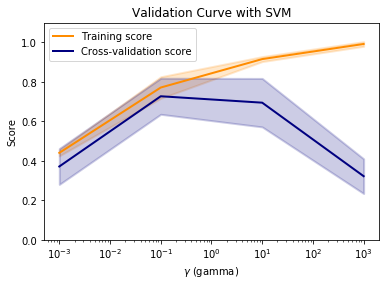

In [45]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

In [54]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
clf = DecisionTreeClassifier().fit(X_train,y_train)
print("Training Score:",clf.score(X_train,y_train))
print("Testing Score:",clf.score(X_test,y_test))

Training Score: 1.0
Testing Score: 0.9736842105263158


In [61]:
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf=8,random_state=0).fit(X_train,y_train)
print("Training Score:",clf.score(X_train,y_train))
print("Testing Score:",clf.score(X_test,y_test))

Training Score: 0.9647887323943662
Testing Score: 0.9370629370629371
